# Databases searched for the Oxford Catalogue of Opioids  

#### This notebook visualises the extracted data for one of my DPhil chapters, more details about this is available on my OSF project page [here](https://osf.io/2ph6c/). 

In [1]:
# import libraries required for analysis 
import numpy as np
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Whole Ox Cat of Opioids import 
df1 = pd.read_csv("oxcat.csv",thousands=',')
df1.head()

,drug_name,new_search,new_source,literature,BNF,BNF_code,BNF_cat,ATC,ATC_code,ATC_cat,...,NOP_receptor,class,class_2,year_disco_develop,country_disco_develop,name_disco_develop,group_disco_develop,discovery_source,regulated_year,regulations
0,3-methylfentanyl,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3-methylthiofentanyl,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4-chloroisobutyrfentanyl,1.0,literature,https://pubmed.ncbi.nlm.nih.gov/28349714/,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4-fluoroisobutyrfentanyl,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4-phenylfentanyl,1.0,literature,https://pubs.acs.org/doi/abs/10.1021/jm00132a007,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,synthetic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Bar graph of the 7 databases used to identify the opioids

In [2]:
# import data 
df2 = pd.read_csv("chp5.csv",thousands=',')
df2.head()

,databases,opioids,percent
0,INN,170,74
1,INCB,122,53
2,Merck,111,48
3,Martindale,69,30
4,Guide to Pharmacology,59,26


In [3]:
df2.describe()

,opioids,percent
count,7.000000,7.000000
mean,88.857143,38.571429
std,47.488344,20.703117
min,33.000000,14.000000
25%,58.500000,25.500000
50%,69.000000,30.000000
75%,116.500000,50.500000
max,170.000000,74.000000


In [4]:
df2.dtypes

databases    object
opioids       int64
percent       int64
dtype: object

In [5]:
df2.columns

Index(['databases', 'opioids', 'percent'], dtype='object')

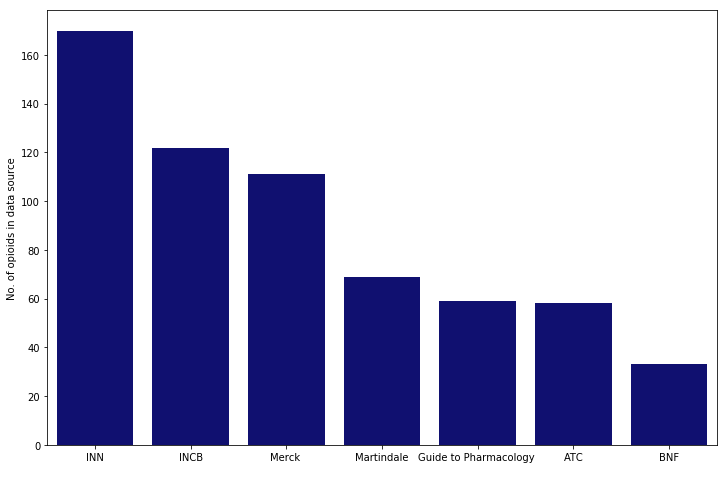

In [6]:
# plot data as a bar graph using seaborn
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df2, x="databases", y="opioids", color="navy")
plt.xlabel(' ')
plt.ylabel('No. of opioids in data source')

plt.savefig("databases.png", dpi=600)

In [ ]:
df2.columns = ['databases', 'opioids', 'percent']